<a href="https://colab.research.google.com/github/flowkite/Smart_Construction/blob/master/%EC%82%AC%EB%9E%8C%EC%95%88%EC%A0%84%EB%AA%A8%EC%A1%B0%EB%81%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Aug 15 12:10:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME =  os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7uV6M2iZzJ6iMFztawSy")
project = rf.workspace("roboflow-100").project("construction-safety-gsnvb")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.154, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to construction-safety-2 in yolov8:: 100%|██████████| 2424/2424 [00:01<00:00, 1833.71it/s]


In [6]:
!pip install PyYaml

In [7]:
import yaml

data = { 'train' :'/content/construction-safety-2/train' ,
        'val' : '/content/construction-safety-2/valid' ,
        'test' : '/content/construction-safety-2/test' ,
        'names' : ['helmet', 'jacket','vest','no-helmet','no-vest'],
         'nc' : 5}
with open('/content/construction-safety-2/data.yaml', 'w') as f:
  yaml.dump(data, f)

with open('/content/construction-safety-2/data.yaml', 'r') as f:
  jacket_yaml = yaml.safe_load(f)
  display(jacket_yaml)

{'names': ['helmet', 'jacket', 'vest', 'no-helmet', 'no-vest'],
 'nc': 5,
 'test': '/content/construction-safety-2/test',
 'train': '/content/construction-safety-2/train',
 'val': '/content/construction-safety-2/valid'}

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=1000


/content
100% 21.5M/21.5M [00:00<00:00, 110MB/s] 
Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/construction-safety-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes

/content


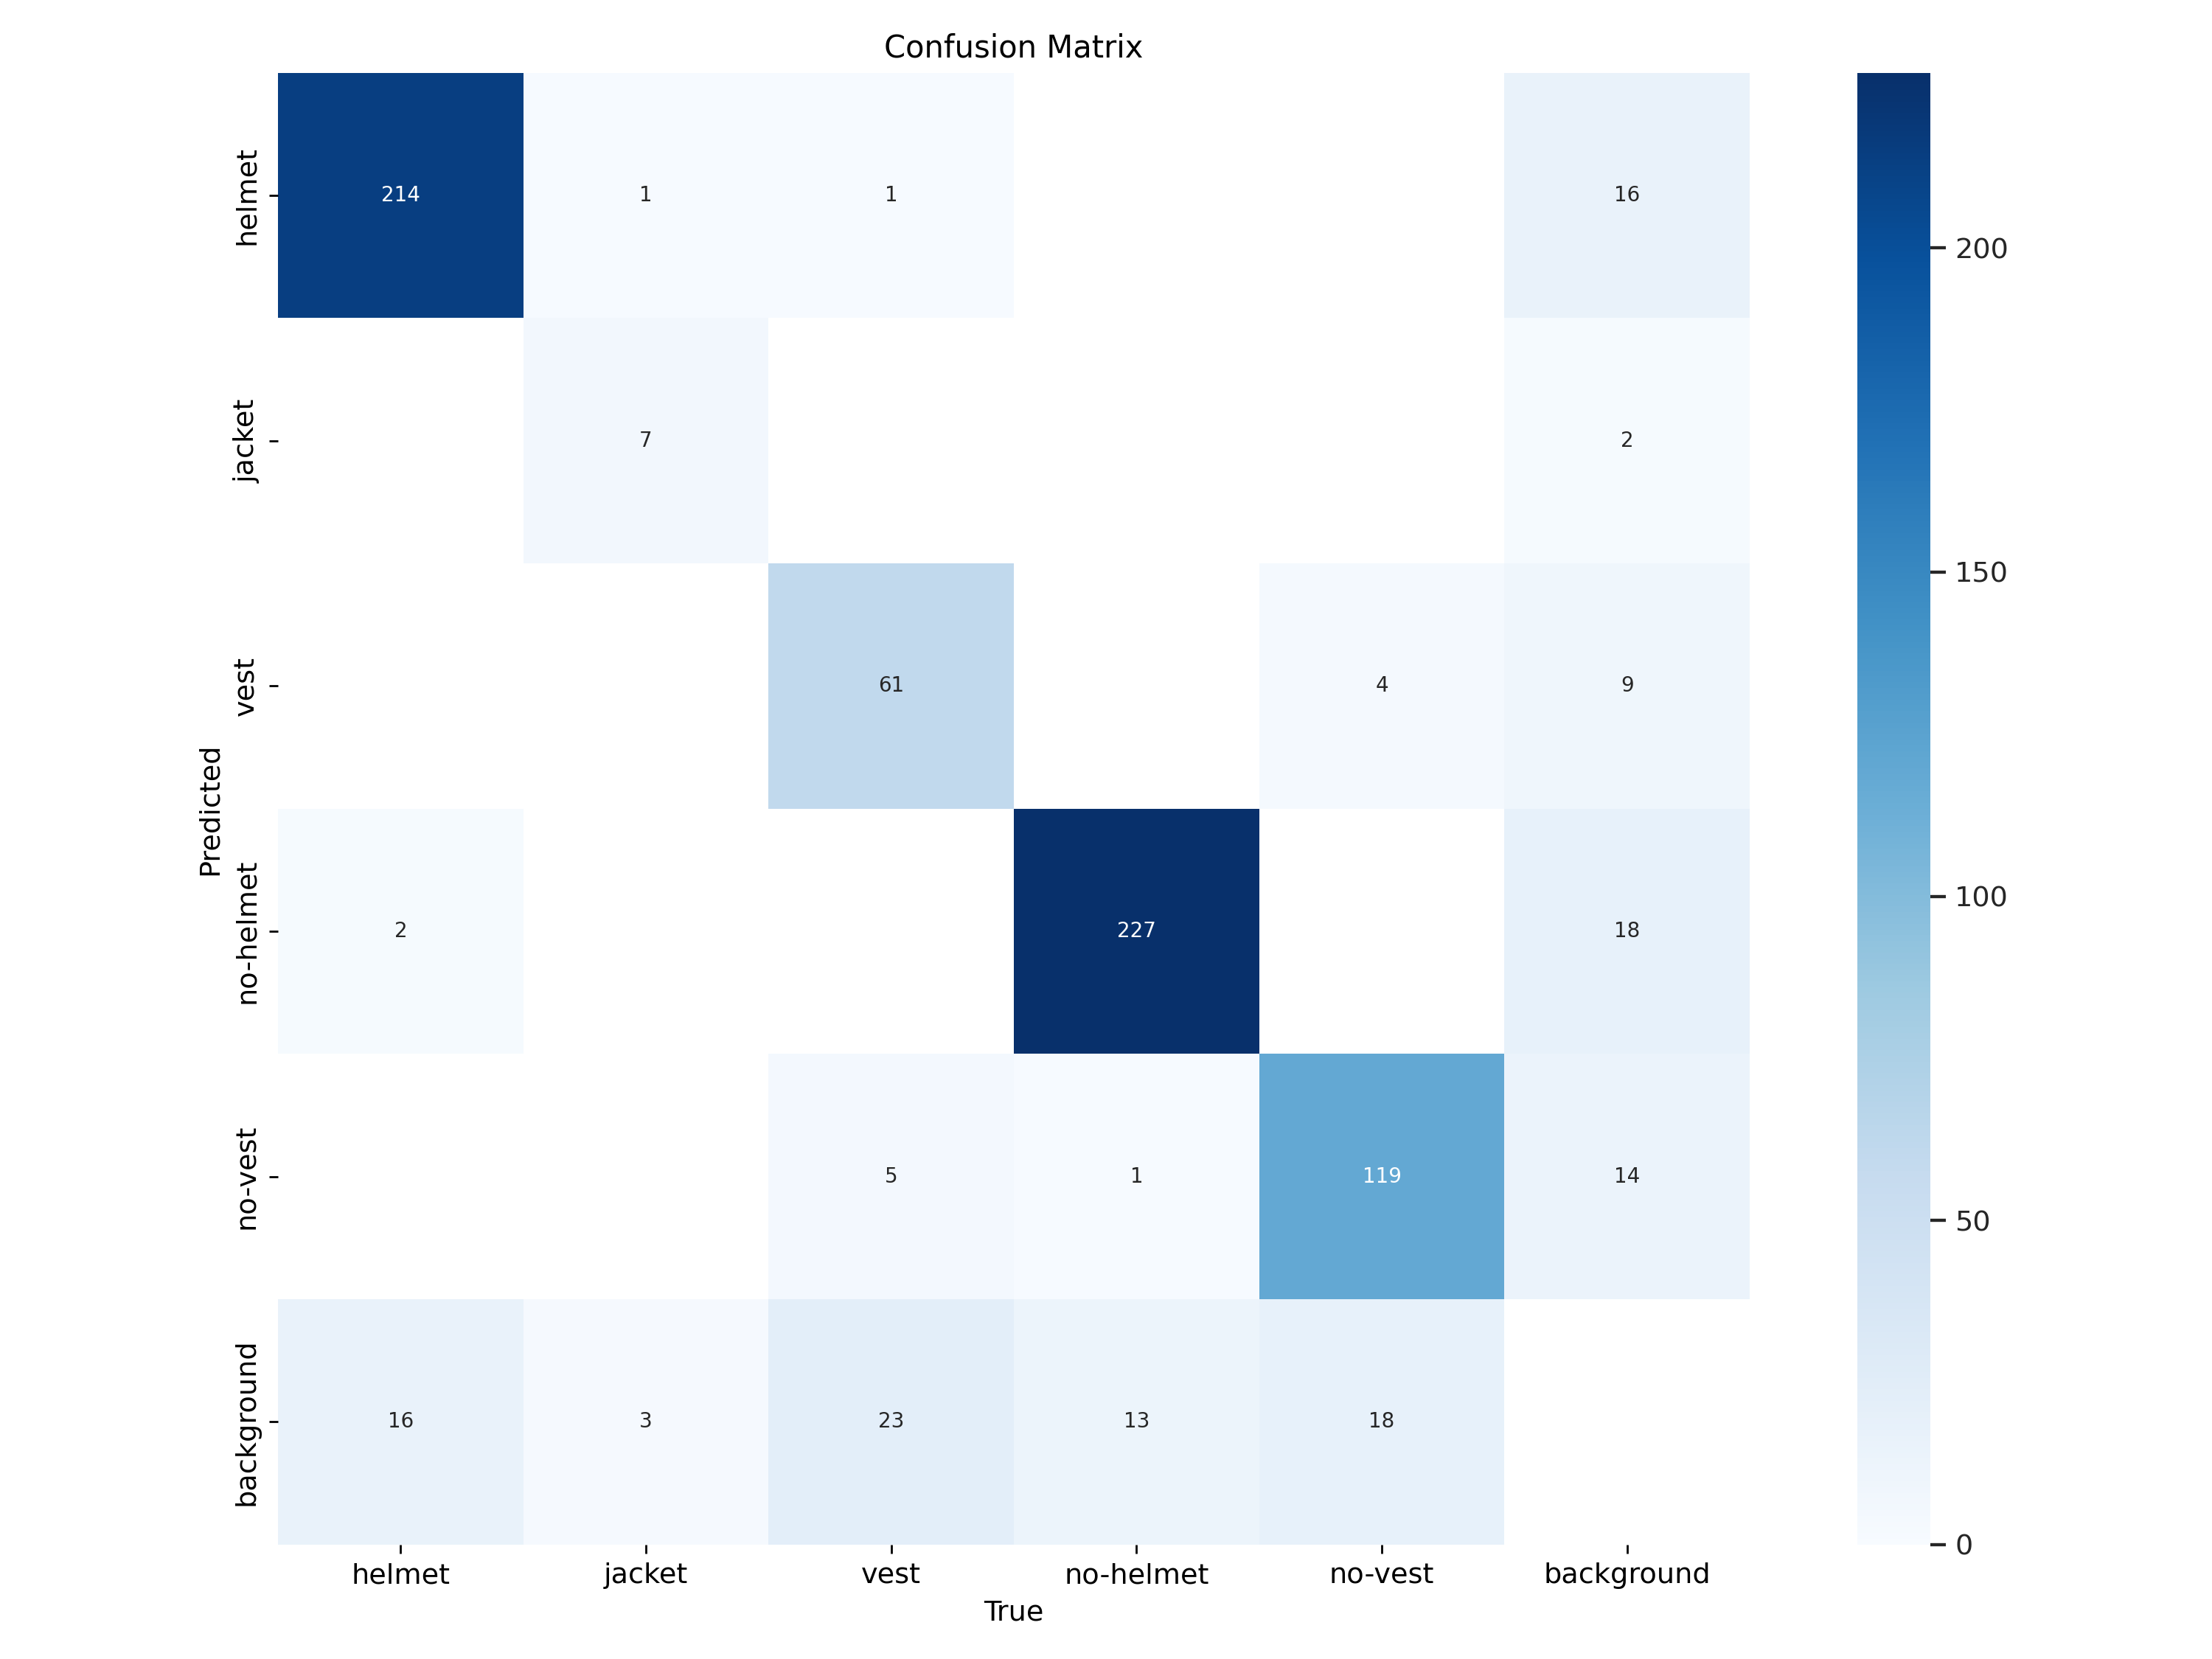

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


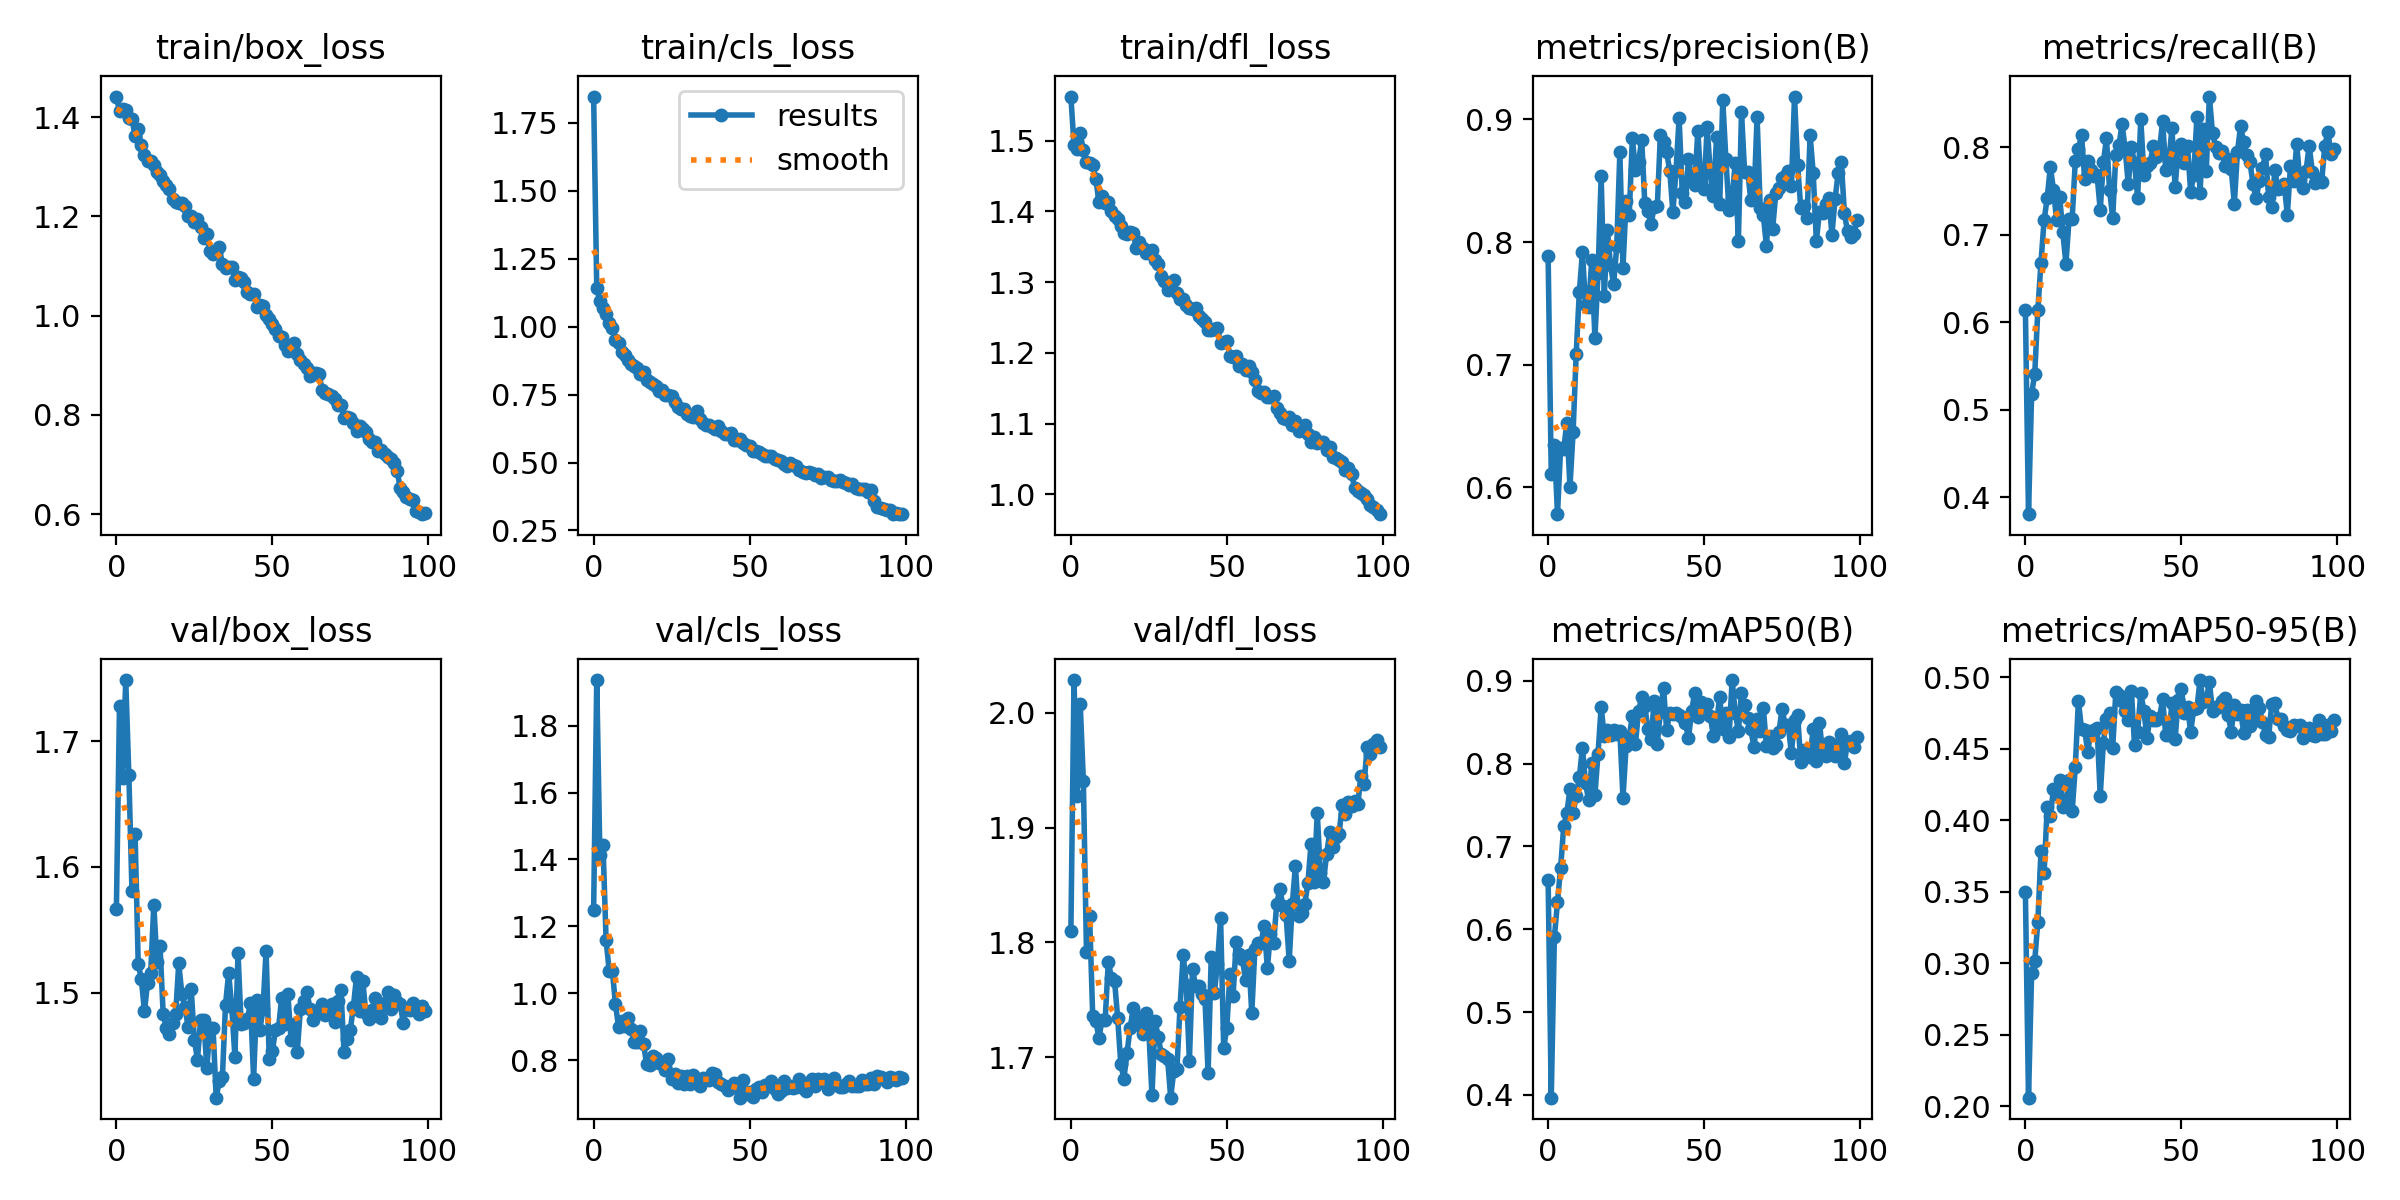

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients
val: Scanning /content/construction-safety-2/valid/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100% 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:10<00:00,  1.26s/it]
                   all        119        715      0.814      0.839      0.869      0.495
                helmet        119        232       0.89       0.94      0.936      0.528
                jacket        119         11      0.701      0.641      0.715      0.328
                  vest        119         90      0.788      0.778      0.829      0.455
             no-helmet        119        241      0.899       0.95      0.951      0.636
               no-vest        119        141      0.792      0.887      0.915      0.532
Speed: 10.2ms preprocess, 21.1ms inference

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/yolov8n.pt conf=0.25 source=/content/psoco

/content
Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/19 /content/psoco/1.png: 640x480 2 persons, 1 boat, 89.0ms
image 2/19 /content/psoco/10.png: 480x640 1 person, 1 train, 1 traffic light, 60.1ms
image 3/19 /content/psoco/11.png: 480x640 1 person, 6.4ms
image 4/19 /content/psoco/12.png: 640x480 2 persons, 1 umbrella, 7.1ms
image 5/19 /content/psoco/13.png: 640x480 2 persons, 1 umbrella, 6.4ms
image 6/19 /content/psoco/14.png: 480x640 2 persons, 1 truck, 7.1ms
image 7/19 /content/psoco/15.png: 640x480 1 person, 1 bench, 7.1ms
image 8/19 /content/psoco/16.png: 480x640 1 person, 1 train, 1 truck, 7.4ms
image 9/19 /content/psoco/17.png: 480x640 8 persons, 1 truck, 8.4ms
image 10/19 /content/psoco/18.png: 480x640 15 persons, 1 train, 1 truck, 8.0ms
image 11/19 /content/psoco/19.png: 480x640 15 persons, 6.7ms
image 12/19 /content/psoco/2.png: 480x640 2 persons, 6.4ms
ima